# Course: Recommender Systems.

## "Intro to Collaborative Filtering" plus homework

The code examples are based on T. Segaran [Programming Collective Intelligence book. Chapter 2](http://shop.oreilly.com/product/9780596529321.do)

The homework task is formulated in the last cells.

**Lecturer:** Dmitry Ignatov [dmitrii.ignatov@gmail.com](dmitrii.ignatov@gmail.com)

**TA:** Denis Pozdnyakov [dvpozdnyakov@hse.ru](dvpozdnyakov@hse.ru)

**Q&A:** course chat ([link](https://t.me/+0vRUxEY27sE1OTBi)) or via TA's e-mail


**Soft deadline** (up to 10 points): <span style="color:red">*** Oct 26***</span>   
**Hard deadline** (-2 points):  <span style="color:blue">***Oct 29***</span>    


---


 
Please send your final notebooks to both teaching assistants (and lecturer in CC) with the **mandatory topic** ***[RecSys4DS2024-HW1-Coll_Filt-your_full_name]***.



## Dictionary with user preferences

In [1]:
# A dictionary of movie critics and their ratings of a small
# set of movies

critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [2]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [3]:
critics['Lisa Rose']['Lady in the Water']

2.5

In [4]:
#Euclid distance
from math import sqrt
sqrt(pow(5-4,2)+pow(4-1,2))


3.1622776601683795

In [5]:
#distance-based simialrity 
1/(1+sqrt(pow(5-4.5,2)+pow(5-5,2)))

0.6666666666666666

In [6]:
from numpy import exp

In [8]:
exp(-0.3*sqrt(pow(5-4.5,2)+pow(5-5,2))**2)


0.9277434863285529

In [10]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)


In [11]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_kernel(prefs,person1,person2,alpha=0.3):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences and take the wieghted exponent
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return exp(-alpha*sum_of_squares)

In [13]:
sim_kernel(critics, 'Lisa Rose','Toby')

0.3499377491111553

In [14]:
sim_distance(critics, 'Lisa Rose','Toby')

0.2222222222222222

In [15]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
 # Get the list of mutually rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: si[item]=1

     # if they are no ratings in common, return 0
    if len(si)==0: return 0

    # The number of mutually rated movies
    n=len(si)
  
    # Sums of all the preferences
    sum1=sum([prefs[p1][it] for it in si])
    sum2=sum([prefs[p2][it] for it in si])
  
    # Sums of the squares
    sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	
  
     # Sum of the products
    pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
     # Calculate r (Pearson score)
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0

    r=num/den

    return r

In [17]:
sim_pearson(critics,'Lisa Rose','Gene Seymour'), sim_distance(critics, 'Lisa Rose','Gene Seymour')



(0.39605901719066977, 0.14814814814814814)

##  Ranking of critics

In [18]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.

def topMatches(prefs,person,n=5,similarity=sim_pearson):
    scores=[(similarity(prefs,person,other),other)
    for other in prefs if other!=person]
    # Descending sorting
    scores.sort( )
    scores.reverse( )
    return scores[0:n]


In [19]:
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

In [20]:
topMatches(critics,'Toby',n=3, similarity=sim_kernel)

[(0.5091564206075492, 'Mick LaSalle'),
 (0.4723665527410147, 'Michael Phillips'),
 (0.37719235356315695, 'Claudia Puig')]

In [21]:
topMatches(critics,'Toby',n=3, similarity=sim_distance)

[(0.3076923076923077, 'Mick LaSalle'),
 (0.2857142857142857, 'Michael Phillips'),
 (0.23529411764705882, 'Claudia Puig')]

## Movie recommendation (User-based approach)

In [22]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings

def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
     # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)
     # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
    # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
     # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
        # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
     # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    # Return the sorted list
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [24]:
getRecommendations(critics,'Toby')


[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [25]:
getRecommendations(critics,'Toby', sim_kernel)

[(3.5469111370529656, 'The Night Listener'),
 (2.729687080418633, 'Lady in the Water'),
 (2.518799545549861, 'Just My Luck')]

In [26]:
getRecommendations(critics,'Toby', sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

## Items similarity

How to replace 

{'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}}

by

{'Lady in the Water':{'Lisa Rose':2.5,'Gene Seymour':3.0},
'Snakes on a Plane':{'Lisa Rose':3.5,'Gene Seymour':3.5}}?


In [28]:
def transformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
    # Flip item and person
    
            result[item][person]=prefs[person][item]
    return result

In [29]:
movies=transformPrefs(critics)


In [30]:
movies

{'Lady in the Water': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.0,
  'Michael Phillips': 2.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0},
 'Snakes on a Plane': {'Lisa Rose': 3.5,
  'Gene Seymour': 3.5,
  'Michael Phillips': 3.0,
  'Claudia Puig': 3.5,
  'Mick LaSalle': 4.0,
  'Jack Matthews': 4.0,
  'Toby': 4.5},
 'Just My Luck': {'Lisa Rose': 3.0,
  'Gene Seymour': 1.5,
  'Claudia Puig': 3.0,
  'Mick LaSalle': 2.0},
 'Superman Returns': {'Lisa Rose': 3.5,
  'Gene Seymour': 5.0,
  'Michael Phillips': 3.5,
  'Claudia Puig': 4.0,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 5.0,
  'Toby': 4.0},
 'You, Me and Dupree': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.5,
  'Claudia Puig': 2.5,
  'Mick LaSalle': 2.0,
  'Jack Matthews': 3.5,
  'Toby': 1.0},
 'The Night Listener': {'Lisa Rose': 3.0,
  'Gene Seymour': 3.0,
  'Michael Phillips': 4.0,
  'Claudia Puig': 4.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0}}

In [28]:
topMatches(movies,'Snakes on a Plane',5, sim_pearson)

[(0.7637626158259785, 'Lady in the Water'),
 (0.11180339887498941, 'Superman Returns'),
 (-0.3333333333333333, 'Just My Luck'),
 (-0.5663521139548527, 'The Night Listener'),
 (-0.6454972243679047, 'You, Me and Dupree')]

In [31]:
topMatches(movies,'Snakes on a Plane',5, sim_distance)

[(0.2222222222222222, 'Lady in the Water'),
 (0.18181818181818182, 'The Night Listener'),
 (0.16666666666666666, 'Superman Returns'),
 (0.10526315789473684, 'Just My Luck'),
 (0.05128205128205128, 'You, Me and Dupree')]

In [25]:
getRecommendations(movies,'Lady in the Water', sim_distance)

[(3.352635310801229, 'Claudia Puig'), (2.4730878186968837, 'Toby')]

## Item-based collaborative filtering

In [32]:
def calculateSimilarItems(prefs,n=10):
    # Create a dictionary of items showing which other items they
  # are most similar to.
    result={}
    # Invert the preference matrix to be item-centric
    itemPrefs=transformPrefs(prefs)
    c=0
    for item in itemPrefs:
    # Status updates for large datasets
        c+=1
        if c%100==0: print("%d / %d" % (c,len(itemPrefs)))
    # Find the most similar items to this one
        scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
        result[item]=scores
    return result

In [33]:
itemsim=calculateSimilarItems(critics)
itemsim

{'Lady in the Water': [(0.4, 'You, Me and Dupree'),
  (0.2857142857142857, 'The Night Listener'),
  (0.2222222222222222, 'Snakes on a Plane'),
  (0.2222222222222222, 'Just My Luck'),
  (0.09090909090909091, 'Superman Returns')],
 'Snakes on a Plane': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'The Night Listener'),
  (0.16666666666666666, 'Superman Returns'),
  (0.10526315789473684, 'Just My Luck'),
  (0.05128205128205128, 'You, Me and Dupree')],
 'Just My Luck': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'You, Me and Dupree'),
  (0.15384615384615385, 'The Night Listener'),
  (0.10526315789473684, 'Snakes on a Plane'),
  (0.06451612903225806, 'Superman Returns')],
 'Superman Returns': [(0.16666666666666666, 'Snakes on a Plane'),
  (0.10256410256410256, 'The Night Listener'),
  (0.09090909090909091, 'Lady in the Water'),
  (0.06451612903225806, 'Just My Luck'),
  (0.05333333333333334, 'You, Me and Dupree')],
 'You, Me and Dupree': [(0.4,

In [34]:
def getRecommendedItems(prefs,itemMatch,user):
    userRatings=prefs[user]
    scores={}
    totalSim={}

    # Loop over items rated by this user
    for (item,rating) in userRatings.items():
        
    # Loop over items similar to this one
        for (similarity,item2) in itemMatch[item]:
    # Ignore if this user has already rated this item
            if item2 in userRatings: continue
         # Weighted sum of rating times similarity
            scores.setdefault(item2,0)
            scores[item2]+=similarity*rating
         # Sum of all the similarities
            totalSim.setdefault(item2,0)
            totalSim[item2]+=similarity
            if totalSim[item2]==0: totalSim[item2]=0.0000001 # to avoid divison by zero
    # Divide each total score by total weighting to get an average
    rankings=[(score/totalSim[item],item) for item,score in scores.items( ) ]

    # Return the rankings from highest to lowest
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [35]:
getRecommendedItems(critics,itemsim,'Toby')


[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

## Recommendations on MovieLens data 

Source: http://grouplens.org/datasets/movielens/

In [36]:
def loadMovieLens(path='data/'):
# Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
 # Load data
    prefs={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [37]:
prefs=loadMovieLens( )

In [41]:
prefs['87']

{'Naked Gun 33 1/3: The Final Insult (1994)': 4.0,
 'Con Air (1997)': 4.0,
 'Sabrina (1995)': 4.0,
 'Waterworld (1995)': 4.0,
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)': 3.0,
 'Clueless (1995)': 4.0,
 'Jurassic Park (1993)': 5.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Son in Law (1993)': 4.0,
 'Indiana Jones and the Last Crusade (1989)': 5.0,
 'Good, The Bad and The Ugly, The (1966)': 5.0,
 'Dead Poets Society (1989)': 5.0,
 'Dead Man Walking (1995)': 4.0,
 "Joe's Apartment (1996)": 2.0,
 'GoldenEye (1995)': 4.0,
 'M*A*S*H (1970)': 5.0,
 'Something to Talk About (1995)': 2.0,
 'Lightning Jack (1994)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Cowboy Way, The (1994)': 3.0,
 "Ulee's Gold (1997)": 3.0,
 'Addams Family Values (1993)': 2.0,
 '2001: A Space Odyssey (1968)': 5.0,
 'Platoon (1986)': 3.0,
 'Return of the Pink Panther, The (1974)': 4.0,
 'Four Weddings and a Funeral (1994)': 5.0,
 'Under Siege (1992)': 4.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Die Hard: Wit

In [42]:
len(prefs['87'])

210

In [46]:
getRecommendations(prefs,'87')[0:6]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)')]

In [47]:
itemsim=calculateSimilarItems(prefs,n=50)

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


In [49]:
itemsim['Star Kid (1997)']

[(1.0, 'Wonderland (1997)'),
 (1.0, 'Spice World (1997)'),
 (1.0, 'Sphere (1998)'),
 (1.0, 'Spawn (1997)'),
 (1.0, 'Shooting Fish (1997)'),
 (1.0, 'Shadow Conspiracy (1997)'),
 (1.0, 'Replacement Killers, The (1998)'),
 (1.0, 'Red Corner (1997)'),
 (1.0, 'Prophecy II, The (1998)'),
 (1.0, 'Playing God (1997)'),
 (1.0, 'Peacemaker, The (1997)'),
 (1.0, 'Murder at 1600 (1997)'),
 (1.0, 'Mortal Kombat: Annihilation (1997)'),
 (1.0, 'Magic Hour, The (1998)'),
 (1.0, 'Leading Man, The (1996)'),
 (1.0, 'Kull the Conqueror (1997)'),
 (1.0, 'Kicked in the Head (1997)'),
 (1.0, 'Jackal, The (1997)'),
 (1.0, 'Hugo Pool (1997)'),
 (1.0, 'How to Be a Player (1997)'),
 (1.0, 'Half Baked (1998)'),
 (1.0, 'Good Will Hunting (1997)'),
 (1.0, 'Four Days in September (1997)'),
 (1.0, 'Fire Down Below (1997)'),
 (1.0, 'Fast, Cheap & Out of Control (1997)'),
 (1.0, 'Fallen (1998)'),
 (1.0, 'Edge, The (1997)'),
 (1.0, 'Duoluo tianshi (1995)'),
 (1.0, 'Desperate Measures (1998)'),
 (1.0, "Dante's Peak (1997

In [50]:
getRecommendedItems(prefs,itemsim,'87')[0:30]

[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)'),
 (5.0, 'Shine (1996)'),
 (5.0, 'Sense and Sensibility (1995)'),
 (5.0, 'Scream (1996)'),
 (5.0, 'Rumble in the Bronx (1995)'),
 (5.0, 'Rock, The (1996)'),
 (5.0, 'Robin Hood: Prince of Thieves (1991)'),
 (5.0, 'Reservoir Dogs (1992)'),
 (5.0, 'Police Story 4: Project S (Chao ji ji hua) (1993)'),
 (5.0, 'House of the Spirits, The (1993)'),
 (5.0, 'Fresh (1994)'),
 (5.0, 'Denise Calls Up (1995)'),
 (5.0, 'Day the Sun Turned Cold, The (Tianguo niezi) (1994)'),
 (5.0, 'Before the Rain (Pred dozhdot) (1994)'),
 (5.0, 'Assignment, The (1997)'),
 (5.0, '1-900 (1994)'),
 (4.875, "Ed's Next Move (1996)"),
 (4.833333333333333, 'Anna (1996)'),
 (4.8, 'Dark City 

In [51]:
setIB=set([t[1] for t in  getRecommendedItems(prefs,itemsim,'87')[0:30]])

In [52]:
setUB=set([t[1] for t in getRecommendations(prefs,'87')[0:30]])


In [53]:
setIB.intersection(setUB)

{'Anna (1996)', 'Usual Suspects, The (1995)'}

# Homework 2 (RecSys). Comparison of User-based and Item-based approaches

1. Implement MAE  and RMSE errors' estimators for [Movie Lens](http://grouplens.org/datasets/movielens/) data with 100,000 ratings.  
As a training set you need a file with .base extension, but a testing set has extension .test: the pairs of files u1.base and u1.test, ..., u5.base and u5.test. Each such pair is the 80%/20% random split of the input data for all users $u$ into test and training sets.
2. For each method (user-based and item-based) plot MAE and RMSE dependence by the number of neighbours  in a range from 1 to 100 with a reasonable step.
3. If you are not satisfied with your prediction quality (MAE>1.0), then try formulas 2.6 and 2.7 from the review http://files.grouplens.org/papers/FnT%20CF%20Recsys%20Survey.pdf.

There are alternative formulas: 
$$r_{u,i} = k\sum\limits_{u^\prime \in U}\operatorname{sim}(u,u^\prime)r_{u^\prime, i} $$ 
(the case of user-based model)

$$r_{u,i} = \frac{1}{N}\sum\limits_{u^\prime \in U}r_{u^\prime, i}$$

$$r_{u,i} = \bar{r_u} +  k\sum\limits_{u^\prime \in U} sim(u,u^\prime)(r_{u^\prime, i}-\bar{r_{u^\prime}} ) \text{,\ где\ } k =1/\sum_{u^\prime \in U}|\operatorname{sim}(u,u^\prime)|.$$

4. Compare the results as in 1 and 2. 

5. How MAE (RMSE) varies by the top-n size: $n \in \{1,3,5,10,15,20,30,40,50,100\}$? 

6. Which movies are recommended more often -- popular with high ratings or rare ones (i.e. with low number of ratings) with high ratings?

7. What to do if the neigbourhood (similar users or items to a target user or a certain item) is too small? How to evaluate the confidence of such recommendations? 

8. *Auxiliary.* How different are top-n list for user-based and item-based methods. Try to improve the results by grid search on $\beta$ parameter for MAE (RMSE) minimisation in hybrid recommendations depending on the number of neighbours (or top-n size):

$$\beta\cdot r^{user-based}_{ui} + (1-\beta)\cdot r^{item-based}_{ui}, \text{ where } 0 \leq \beta \leq 1.$$ 



In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
path = 'datasets/ml-100k/'
args = {'sep':'\t', 'names': ["user_id", "movie_id", "rating", "timestamp"], 'engine': 'python'}
df_train = pd.read_csv(path + 'u1.base', **args)
df_test  = pd.read_csv(path + 'u1.test', **args)

In [5]:
df_train.head(5)

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [25]:
def data_to_dict(df):
    # user-to-item dictionary
    res = {}
    for i, row in df.iterrows():
        user_id, movie_id, rating = row['user_id'], row['movie_id'], row['rating']
        res.setdefault(user_id, {})
        res[user_id][movie_id] = rating
    return res

from scipy.spatial.distance import cosine

def cosine_similarity(u1, u2, matrix):
    common = set(matrix[u1].keys()).intersection(set(matrix[u2].keys()))
    if len(common) == 0:
        return 0
    
    ratings1 = []
    ratings2 = []
    for item in common:
        ratings1.append(matrix[u1][item])
        ratings2.append(matrix[u2][item])

    return 1 - cosine(np.array(ratings1), np.array(ratings2))


## User-based predict

In [26]:
def predict_user_based(user_id, movie_id, rates, num_neighbors=5):
    
    users_by_item = [user for user in rates if movie_id in rates[user] and user != user_id]
    sims = [(other_user, cosine_similarity(user_id, other_user, rates))
                    for other_user in users_by_item]
    sims = sorted(sims, key=lambda x: x[1], reverse=True)[:num_neighbors]

    numerator = sum(sim * rates[other_user][movie_id] for other_user, sim in sims)
    denominator = sum(abs(sim) for _, sim in sims)

    return numerator / denominator if denominator > 0 else 0



## Item-based predict

In [48]:
def transposeRatings(rates):
    result={}
    for user in rates:
        for item in rates[user]:
            result.setdefault(item,{})
            result[item][user]=rates[user][item]
    return result


def predict_item_based(user_id, item_id, ratesIU, rates, nn=5):
    userRatings = rates[user_id]
    if item_id not in ratesIU:
        return 0
    similarities = [(item, cosine_similarity(item_id, item, ratesIU))
                    for item in userRatings if item != item_id]
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:nn]
    numerator = sum(sim * userRatings[item] for item, sim in similarities)
    denominator = sum(abs(sim) for _, sim in similarities)

    return numerator / denominator if denominator > 0 else 0

In [89]:
def fit_predict(test_data, r, rT, num_neighbors=5):
    y_true, y_pred_U, y_pred_I = [], [], []

    for _, row in test_data.iterrows():
        user_id, movie_id, true_rating = row['user_id'], row['movie_id'], row['rating']
        pred_U_rating = predict_user_based(user_id, movie_id, r, num_neighbors)
        pred_I_rating = predict_item_based(user_id, movie_id, rT, r, num_neighbors)

        y_true.append(true_rating)
        y_pred_U.append(pred_U_rating)
        y_pred_I.append(pred_I_rating)

    mae_U = mean_absolute_error(y_true, y_pred_U)
    rmse_U = root_mean_squared_error(y_true, y_pred_U)
    mae_I = mean_absolute_error(y_true, y_pred_I)
    rmse_I = root_mean_squared_error(y_true, y_pred_I)
    return mae_U, rmse_U, mae_I, rmse_I, y_pred_U, y_pred_I

ratings = data_to_dict(df_train)
ratingsT = transposeRatings(ratings)

x = [1, 3, 5, 10, 15, 20, 30, 40, 50, 100]
mae_U_results = []
rmse_U_results = []
mae_I_results = []
rmse_I_results = []

nn_range = tqdm(x)
for n in nn_range:
    mae_U, rmse_U, mae_I, rmse_I, pred_U, pred_I = fit_predict(df_test, ratings, ratingsT, num_neighbors=n)
    mae_U_results.append(mae_U)
    rmse_U_results.append(rmse_U)
    mae_I_results.append(mae_I)
    rmse_I_results.append(rmse_I)
    df_test['pred_U_'+str(n)] = pred_U
    df_test['pred_I_'+str(n)] = pred_I
    nn_range.desc = f"NN = {n:5}, User: MAE: {mae_U:.4f}, RMSE: {rmse_U:.4f}; Item: MAE: {mae_I:.4f}, RMSE: {rmse_I:.4f}"

NN =   100, User: MAE: 0.8174, RMSE: 1.0276; Item: MAE: 0.8374, RMSE: 1.0554: 100%|██████████| 10/10 [25:01<00:00, 150.19s/it]


In [90]:
print(mae_U_results)
print(mae_I_results)
print(rmse_U_results)
print(rmse_I_results)

[1.0475, 0.9008755900355238, 0.8596572608942337, 0.8300499582845803, 0.8207112897540736, 0.8163852776443711, 0.8148527758513104, 0.8137406400701611, 0.81348264093902, 0.8173946643106845]
[1.18305, 1.0058858038979794, 0.9467847971899646, 0.8819571119490108, 0.8554606192788742, 0.844104926943021, 0.8319335166942982, 0.82811800755938, 0.8267152641539588, 0.8373685529141865]
[1.4072313242676202, 1.1487289737317916, 1.0905245646807782, 1.049626173991813, 1.0373011600143802, 1.0313513723790415, 1.0275067103581113, 1.0255993707143995, 1.0250055273762406, 1.0275974957416592]
[1.5705572259551703, 1.2857079311981228, 1.2049280553072332, 1.1207189226319492, 1.0863287734559315, 1.071124608699605, 1.0561283868645055, 1.0516641302739524, 1.0500266756096306, 1.0553823429286036]


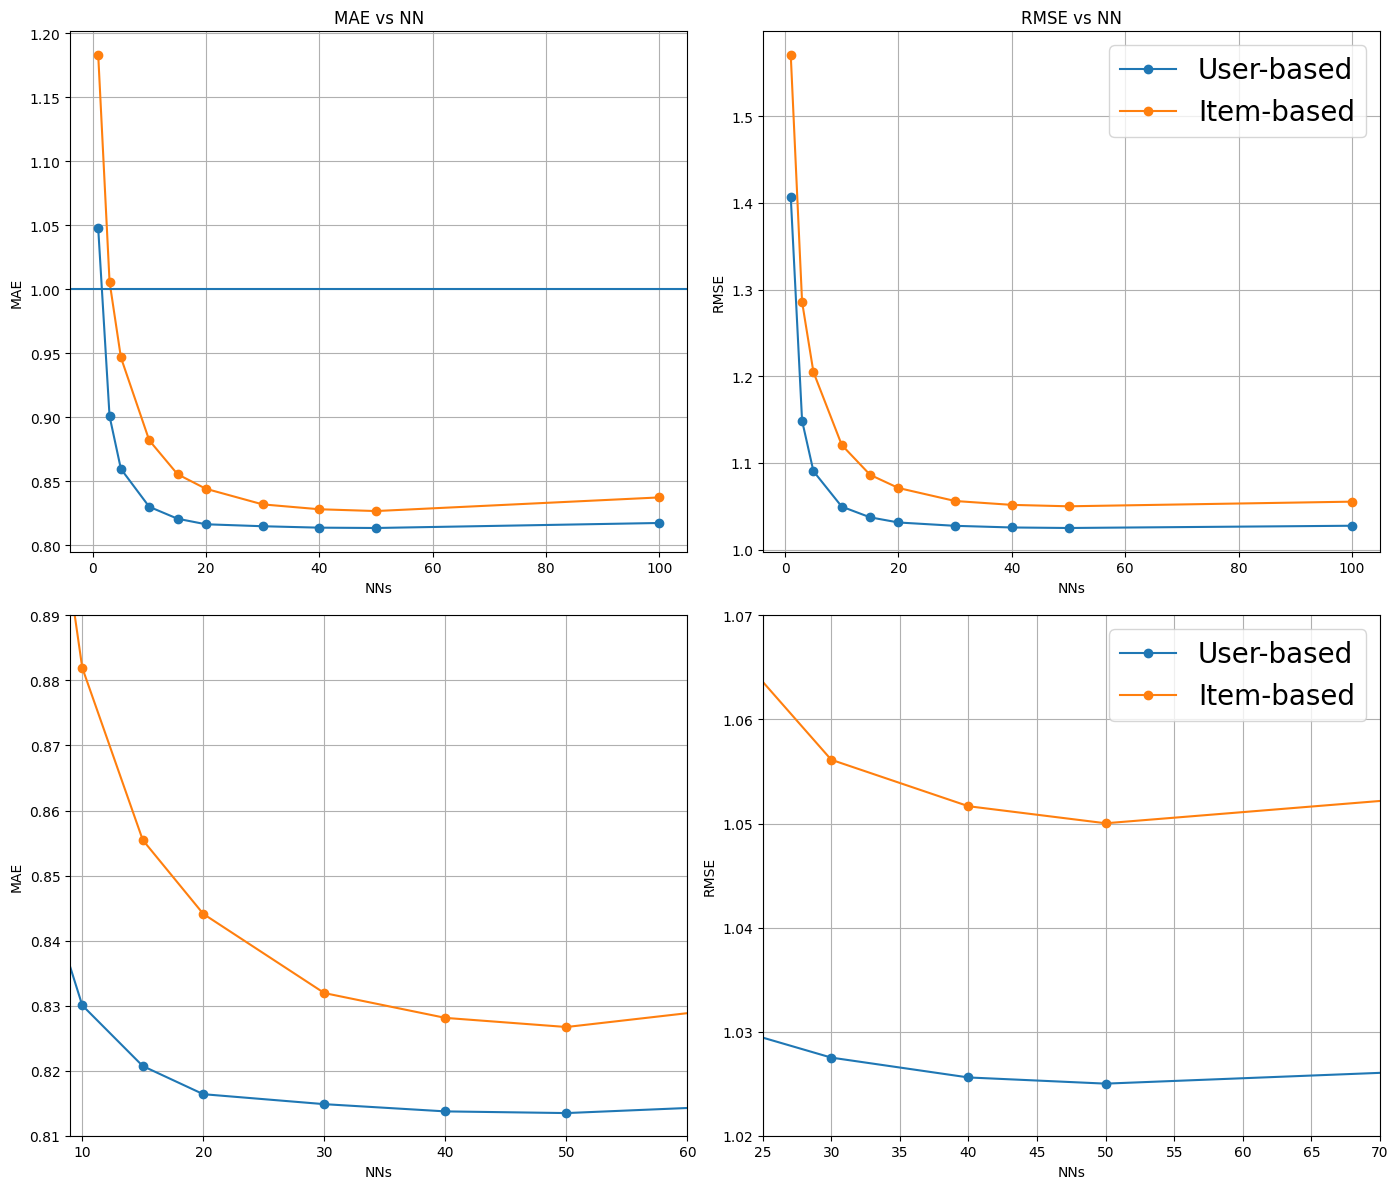

In [91]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.plot(x, mae_U_results,  marker='o', label='User-based')
plt.plot(x, mae_I_results,  marker='o', label='Item-based')
plt.xlabel('NNs')
plt.ylabel('MAE')
plt.title('MAE vs NN')
plt.axhline(1)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, rmse_U_results, marker='o', label='User-based')
plt.plot(x, rmse_I_results, marker='o', label='Item-based')
plt.xlabel('NNs')
plt.ylabel('RMSE')
plt.title('RMSE vs NN')
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize = 20)

plt.subplot(2, 2, 3)
plt.plot(x, mae_U_results,  marker='o', label='User-based')
plt.plot(x, mae_I_results,  marker='o', label='Item-based')
plt.xlabel('NNs')
plt.ylabel('MAE')
plt.axhline(1)
plt.grid(True)
plt.xlim(9, 60)
plt.ylim(0.81, 0.89)

plt.subplot(2, 2, 4)
plt.plot(x, rmse_U_results, marker='o', label='User-based')
plt.plot(x, rmse_I_results, marker='o', label='Item-based')
plt.xlabel('NNs')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.xlim(25, 70)
plt.ylim(1.02, 1.07)
plt.legend(fontsize = 20)
plt.show()

## Task 5. 
Both errors lower until 50 nearest neighbors and then become significantly larger with 100 nearest neighbors

## Task 6

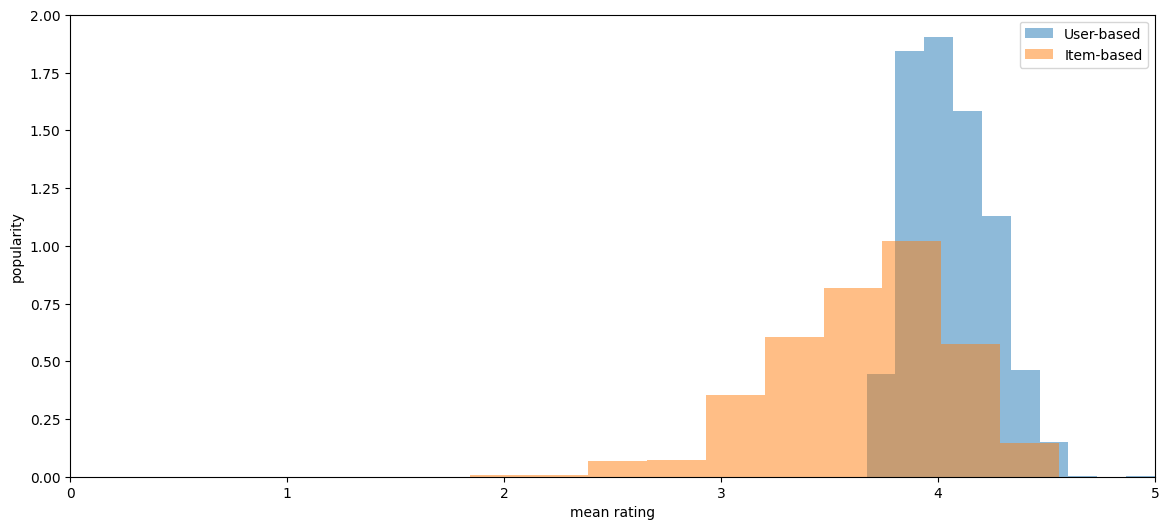

In [123]:
plt.figure(figsize=(14,6))
level = 4.2

popularity = []
mean_ratings = []
for movie_id in df_test[df_test['pred_U_50'] > level]['movie_id'].unique():
    popularity.append((df_train['movie_id'] == movie_id).sum())
    mean_ratings.append(df_train[df_train['movie_id'] == movie_id]['rating'].mean())

plt.hist(mean_ratings, weights=popularity, alpha=0.5,density=True, label='User-based')
#plt.hist(popularity)
plt.ylabel('popularity')
plt.xlabel('mean rating')

popularity = []
mean_ratings = []
for movie_id in df_test[df_test['pred_I_50'] > level]['movie_id'].unique():
    popularity.append((df_train['movie_id'] == movie_id).sum())
    mean_ratings.append(df_train[df_train['movie_id'] == movie_id]['rating'].mean())

plt.hist(mean_ratings, weights=popularity, alpha=0.5, density=True, label='Item-based')
plt.xlim(0,5)
#plt.hist(popularity)
plt.ylabel('popularity')
plt.xlabel('mean rating')
plt.legend();

User-based approached recommends highly popular items (narrow spike) while the Item-based approach recommends items with lower rating more often.

## Task 7

If neighborhood of item/user is lower than taken number of neighbors, we can add a coefficient to the predicted rating:

$$ \hat r_{u,i} = r_{u,i} * \alpha_{nn} = r_{u,i} * \frac{\text{actual number of neighbors}}{\text{taken number of neighbors}},\ 0 <= \alpha_{nn} <= 1 $$

So, it will lower items where there was too low neighborhood, even with high ratings in it.

## Task 8

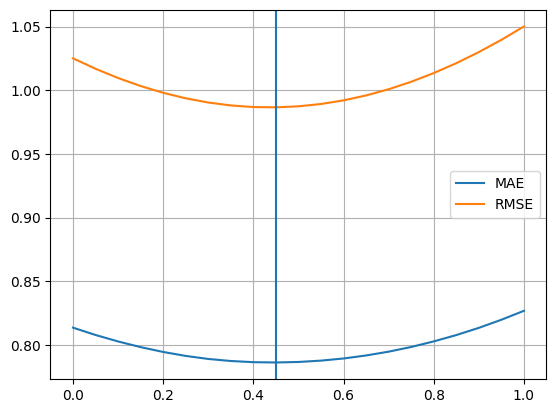

In [114]:
betas = np.linspace(0,1,21)
maes = []
rmses = []
for b in betas:
    y_pred = df_test['pred_I_50'] * b + df_test['pred_U_50'] * (1 - b)
    maes.append(mean_absolute_error(df_test['rating'], y_pred))
    rmses.append(root_mean_squared_error(df_test['rating'], y_pred))

plt.plot(betas, maes, label='MAE')
plt.plot(betas, rmses, label='RMSE')
plt.legend()
plt.grid()
plt.axvline(0.45)


Visually, the best beta for both errors is 0.45.